In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
train = pd.read_csv(DATA_PATH + "flight_delays_train.csv")
test = pd.read_csv(DATA_PATH + "flight_delays_test.csv")

In [4]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [5]:
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


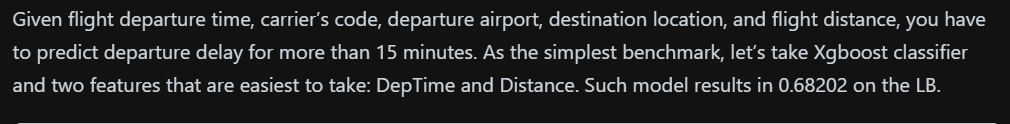

In [6]:
X_train = train[["Distance", "DepTime"]].values
y_train = train["dep_delayed_15min"].map({"Y": 1, "N": 0}).values
X_test = test[["Distance", "DepTime"]].values

X_train_part, X_valid, y_train_part, y_valid = train_test_split(
    X_train, y_train, test_size=0.3, random_state=17
)

In [7]:
xgb_model = XGBClassifier(seed=17)

xgb_model.fit(X_train_part, y_train_part)
xgb_valid_pred = xgb_model.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, xgb_valid_pred)

0.7002330590349366

In [8]:
xgb_model.fit(X_train, y_train)
xgb_test_pred = xgb_model.predict_proba(X_test)[:, 1]

pd.Series(xgb_test_pred, name="dep_delayed_15min").to_csv(
    "xgb_2feat.csv", index_label="id", header=True
)

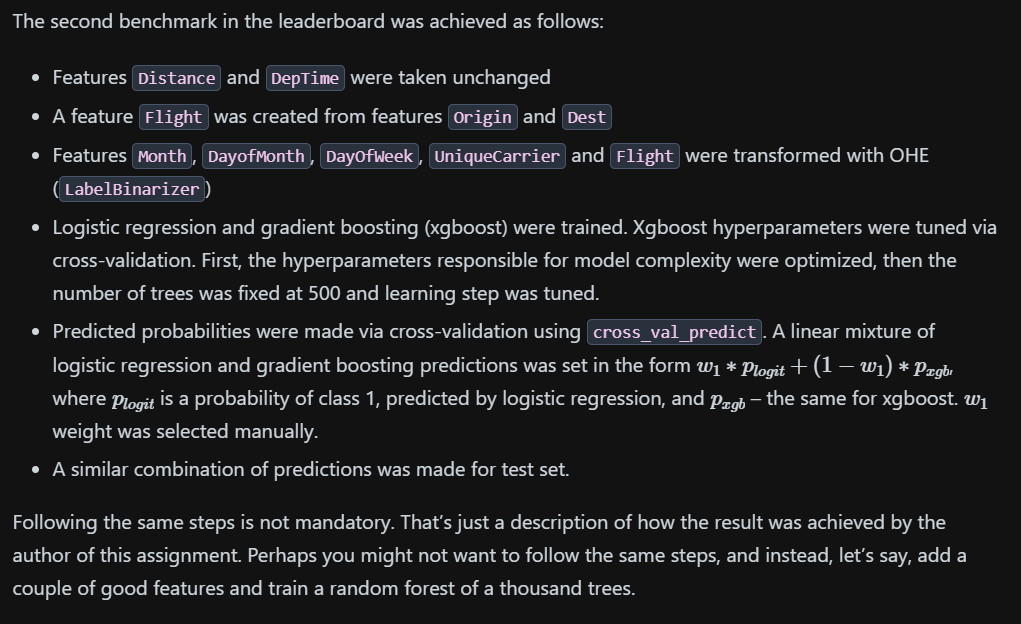